# **BIKE SHARING DATASET**

## **Contexts**

1. Business Understanding
2. Data Understanding
3. EDA & Data Preprocessing
4. Modelling
5. Conclusion & Recommendation

***

### **Business Understanding**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

**Problem Statement**

One of many challenges in this sharing system is to provide sufficient amount of bike at any given time, if we don't provide enough bike, we won't be able to meet customer's demand, and might even lose customer's trust. But supply too much and we'll end up with a lot of unused bikes. In other word, inefficient. 

**Goal**

Which is why with this dataset, we'll try to predict **how much bike we'll need to provide** at a certain time with certain conditions with a regression model best suited for this dataset and metrics that represents model's performance.

**Metrics**

Evaluation metrics that we'll use for this dataset are ```Root Mean Squared Error (RMSE)```, ```Mean Absolute Error (MAE)```, ```Mean Absolute Percentage Error (MAPE)```, and ```R-squared```.

***

### **Data Understanding**

[Original Source:](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)
- Hadi Fanaee-T
- Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
- INESC Porto, Campus da FEUP
- Rua Dr. Roberto Frias, 378
- 4200 - 465 Porto, Portugal

Range of dataset: 2 years (2011-01-01 - 2012-12-31)

**Dataset info:**
|**Feature**|**Data Type**|**Description**|
| --- | --- | --- |
| dteday | object | Date |
| hum | float64 | Normalized humidity. The values are divided to 100 (max) |
| weathersit | int64 | (1: Clear, Few clouds, Partly cloudy, Partly cloudy), (2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist), (3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds), (4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) |
| holiday | int64 | Whether the day is holiday or not |
| season | int64 | (1:winter, 2:spring, 3:summer, 4:fall) |
| atemp | float64 | Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (hourly scale) |
| temp | float64 | Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (hourly scale)
| hr | int64 | Hour of the day (00:00 AM - 23:00 PM)|
| casual | int64 | Count of casual users |
| registered | int64 | Count of registered users |
| cnt | int64 | Count of total rental bikes including both casual and registered |

In [1]:
# Import Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import math
import re 
import matplotlib.pyplot as plt
from matplotlib import style
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
import plotly.io as pio

import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectPercentile

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, ElasticNet
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.svm import SVC, LinearSVC, SVR, LinearSVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay 
from sklearn.metrics import brier_score_loss, classification_report, balanced_accuracy_score, fbeta_score

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingRegressor, StackingRegressor, RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor

import xgboost as XGB
from xgboost.sklearn import XGBClassifier, XGBRegressor
from xgboost import plot_importance

import category_encoders as ce

import shap

import warnings
warnings.filterwarnings('ignore')
pio.renderers.default = 'plotly_mimetype+notebook'
py.init_notebook_mode(connected=True)

In [2]:
# Load Dataset
df = pd.read_csv(r"C:\Users\Byss\Desktop\PWDK\Database\data_bike_sharing.csv")
df

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857
...,...,...,...,...,...,...,...,...,...,...,...
12160,2012-01-25,0.75,1,0,1,0.2273,0.24,7,14,243,257
12161,2012-07-06,0.62,1,0,3,0.7424,0.78,0,39,63,102
12162,2012-02-20,0.60,2,1,1,0.2121,0.24,5,0,6,6
12163,2012-03-31,0.77,2,0,2,0.4242,0.42,2,14,55,69


***

### **Exploratory Data Analysis & Data Preprocessing**

In [3]:
# Checking for missing value
df.isna().sum().sum()

0

In [4]:
# Checking for duplicates
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
# Changing dtype of dteday from object to datetime64
df["dteday"] = df["dteday"].astype("datetime64")

# Sorting the data by time
df = df.sort_values(["dteday", "hr"]).reset_index()
df.drop(columns="index", inplace=True)

# Changing season so that 1= spring, 2= summer, 3= autumn, 4= winter
df["season"] = df["season"].replace([1,2,3,4], [4,1,2,3])

# Renaming some columns
df.rename({"dteday":"date", "hr":"hour", "weathersit":"weather", "cnt":"count"}, axis=1, inplace=True)

# Splitting year, month, and day into separate columns
year = []
month = []
day = []
for i in df["date"]:
    year.append(i.year)
    month.append(i.month)
    day.append(i.day)
df["year"] = year
df["month"] = month
df["day"] = day

In [7]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [8]:
# Checking for multicollinearity and dropping some features
calc_vif(df[["weather", "holiday", "season", "hour", "count"]])

,variables,VIF
0,weather,3.856182
1,holiday,1.031887
2,season,3.913601
3,hour,4.177052
4,count,2.378707


Dropped some features with multicollinearity score (VIF) greater than 4, except for "hour". Because "hour" affects target variable significantly, as we'll see from graphs below.

**Dropped Features:**
- hum
- atemp
- temp
- casual
- registered

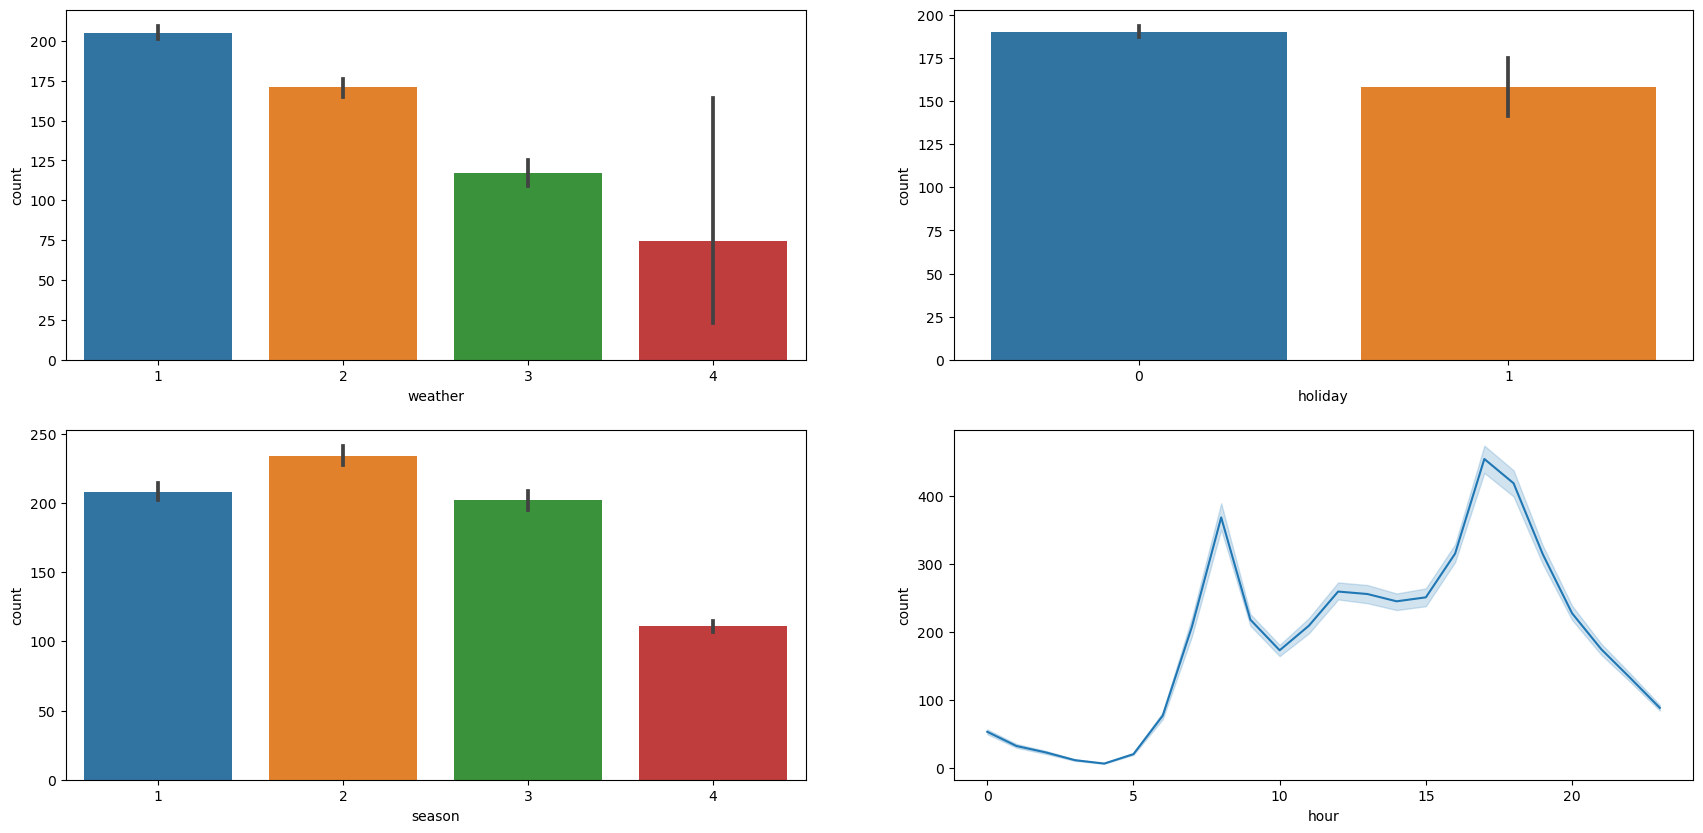

In [9]:
# Features vs Count
style.use("default")
fig, axes = plt.subplots(2,2, figsize=(21, 10))
sns.barplot(data=df, x="weather", y="count", ax=axes[0,0])
sns.barplot(data=df, x="holiday", y="count", ax=axes[0,1])
sns.barplot(data=df, x="season", y="count", ax=axes[1,0])
sns.lineplot(data=df, x="hour", y="count", ax=axes[1,1]);

- Weather affects number of bike rented negatively, number of bike rented is the highest when its weather 1 (sunny), and the lowest when its weather 4 (storm).

- People tend to rent bike on non-holiday.

- Based on season, number of bike rented is at its highest when its summer, and lowest when its winter.

- People tend to rent bike on a certain hour, 8 AM and 5 PM to be specific. More of that on graph below.

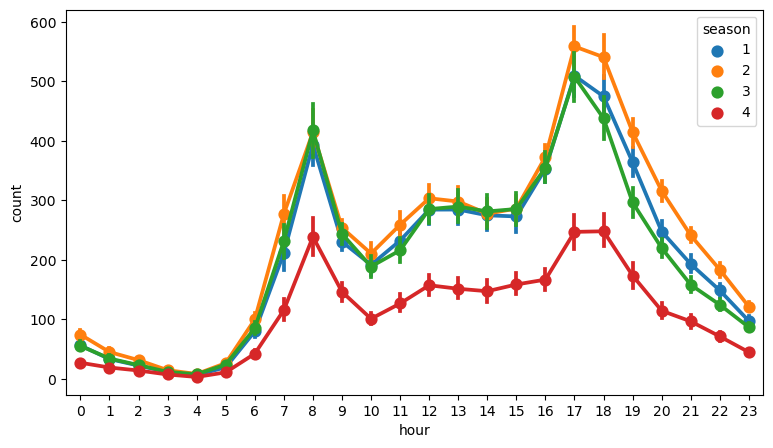

In [10]:
plt.figure(figsize=(9,5))
sns.pointplot(data=df, x="hour", y="count", hue="season");

Despite of the season, the trend stays the same, bike rent is at its peak at 8 AM and 5 PM.

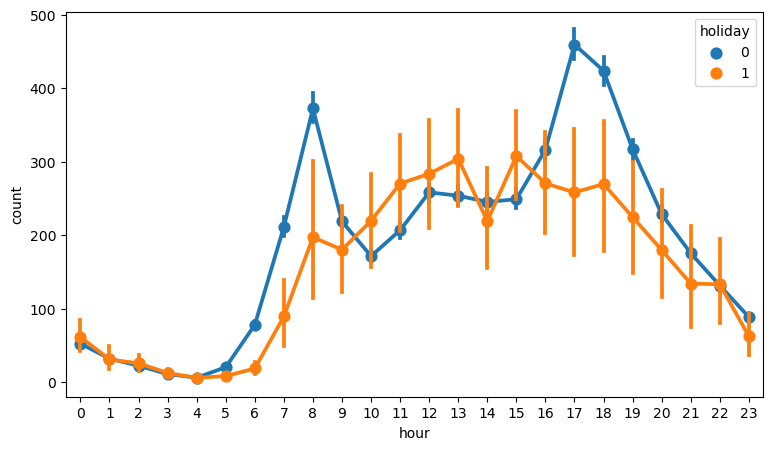

In [11]:
plt.figure(figsize=(9,5))
sns.pointplot(data=df, x="hour", y="count", hue="holiday");

From graph above, we could infer that less people rent bike on a holiday. And most people rent bike at around 1 PM or 3 PM.

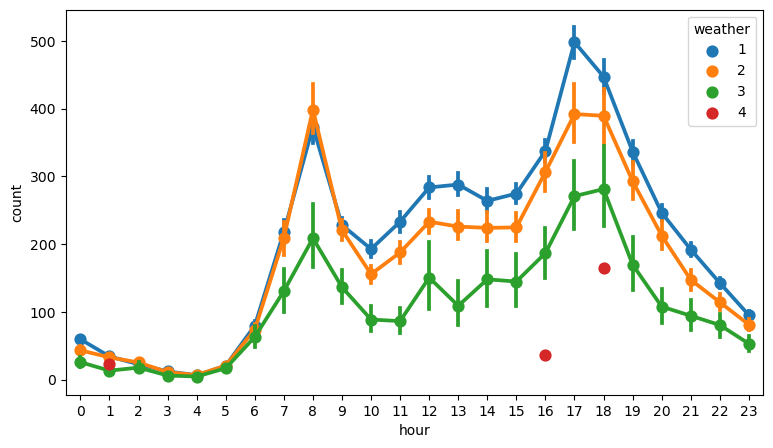

In [12]:
plt.figure(figsize=(9,5))
sns.pointplot(data=df, x="hour", y="count", hue="weather");

In [13]:
df[df["weather"] == 4]

,date,hum,weather,holiday,season,atemp,temp,hour,casual,registered,count,year,month,day
397,2011-01-26,0.93,4,0,4,0.1970,0.22,16,1,35,36,2011,1,26
6219,2012-01-09,0.86,4,0,4,0.2273,0.20,18,6,158,164,2012,1,9
6407,2012-01-21,0.86,4,0,4,0.1364,0.14,1,1,22,23,2012,1,21


Out of 12165 data, only 3 of those have weather value = 4, this might be considered noise, but if we drop weather = 4, it'll affect model's performance negatively *(discovered after comparing model's performance when it's dropped vs when it's not)*. Therefore, we won't drop these 3 rows.

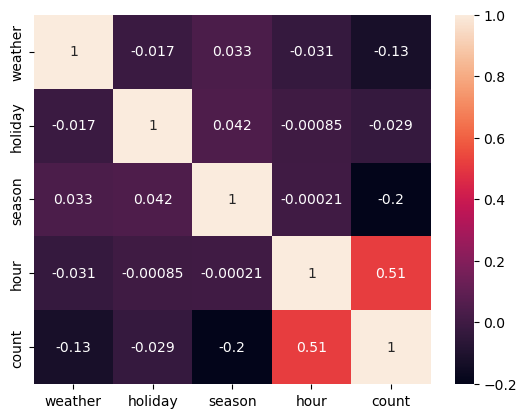

In [14]:
# Checking correlation for each features with count
sns.heatmap(df[["weather", "holiday", "season", "hour", "count"]].corr("spearman"), annot=True);

"hour" has the strongest correlation with number of bike rented "count" at 0.51. Lowest is "holiday" with correlation score of -0.029.

In [15]:
fig = px.box(df, x= ["count"])
fig.show()

After a few trials, we decided NOT to drop the outliers above the upper fence (645), since it'll affect model's performance negatively.

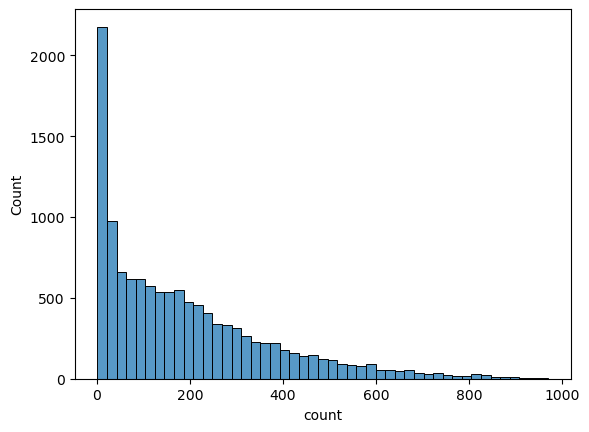

In [16]:
sns.histplot(df["count"]);

Target variable "count" is heavily right skewed, we'll try to resolve this by using ```TransformedTargetRegressor``` on the modelling stage.

[Effect of transforming the targets in regression model](https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html#sphx-glr-auto-examples-compose-plot-transformed-target-py)

In [17]:
# Clean dataset, ready to be analyzed and put into model
df[["date", "weather", "holiday", "season", "hour", "count"]]

,date,weather,holiday,season,hour,count
0,2011-01-01,1,0,4,0,16
1,2011-01-01,1,0,4,1,40
2,2011-01-01,1,0,4,2,32
3,2011-01-01,1,0,4,3,13
4,2011-01-01,1,0,4,4,1
...,...,...,...,...,...,...
12160,2012-12-31,2,0,4,14,247
12161,2012-12-31,2,0,4,16,214
12162,2012-12-31,2,0,4,17,164
12163,2012-12-31,2,0,4,19,119


***

### **Modelling**

In [18]:
# Putting features into dependent and independent variables
X = df[["hour", "weather", "holiday", "season", "year", "month", "day"]]
y = df[["count"]]

# Splitting dataset for model testing and training
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size = 0.2, 
    random_state = 42)

In [19]:
# Feature
to_encode = ["hour", "season", "year", "month", "day"]
to_pass = ["holiday", "weather"]

# Pre-Processor
ohe = OneHotEncoder(drop="first")
ignore_cols = FunctionTransformer()

# Transformer
transformer = ColumnTransformer([("ohe", ohe, to_encode),
                                ("pass", ignore_cols, to_pass)])

In [20]:
# Finding best base model
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, n_jobs=-1)
linreg = LinearRegression()
ridge = Ridge(max_iter=1000, random_state=42)
lasso = Lasso(max_iter=1000, random_state=42)

# Transforming target variable into logarithmic scale for modelling and reversing it for interpretation
log_rf = TransformedTargetRegressor(rf, func=np.log1p, inverse_func=np.expm1)
log_gb = TransformedTargetRegressor(gb, func=np.log1p, inverse_func=np.expm1)
log_xgb = TransformedTargetRegressor(xgb, func=np.log1p, inverse_func=np.expm1)
log_linreg = TransformedTargetRegressor(linreg, func=np.log1p, inverse_func=np.expm1)
log_ridge = TransformedTargetRegressor(ridge, func=np.log1p, inverse_func=np.expm1)
log_lasso = TransformedTargetRegressor(lasso, func=np.log1p, inverse_func=np.expm1)

polynomial = PolynomialFeatures(degree=2, interaction_only=True)

models = [rf, xgb, log_rf, log_xgb]
mae = []
r2 = []
rmse_score = []
mape = []

for i in models:
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    estimator = Pipeline([
        ("preprocessing", transformer),
        ("model", i)
        ])

    rmse_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring="neg_root_mean_squared_error", error_score='raise', n_jobs=-1).mean()
    rmse_score.append(rmse_cv)
    mae_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring="neg_mean_absolute_error", error_score='raise', n_jobs=-1).mean()
    mae.append(mae_cv)
    mape_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring="neg_mean_absolute_percentage_error", error_score='raise', n_jobs=-1).mean()
    mape.append(mape_cv)
    r2_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring="r2", error_score='raise', n_jobs=-1).mean()
    r2.append(r2_cv)

score_before_tuning = pd.DataFrame({"R2":r2, "RMSE":rmse_score, "MAE":mae, "MAPE":mape}, index = ["Random Forest", "XGB", "Log RF", "Log XGB"])
score_before_tuning

,R2,RMSE,MAE,MAPE
Random Forest,0.687214,-101.251675,-65.497637,-0.873896
XGB,0.710903,-97.350659,-66.202625,-0.974506
Log RF,0.669191,-104.122299,-66.510608,-0.745525
Log XGB,0.700938,-99.012794,-64.672550,-0.664838


There are significant difference between RMSE and MAE values, this might happen due to RMSE value is more sensitive to outliers, because RMSE uses "mean" on it's calculation. Therefore, we'll be relying more on MAE or MAPE score going forward. MAPE is mean absolute percentage error, which is basically MAE but in percentage form, MAPE is preffered here because it's easier to comprehend and interpret.

Based on MAPE, the best candidate is Log XGB, with MAPE score of 0.66 or 66% in percentage.

In [21]:
# Hyperparameter tuning
xgb = XGBRegressor(random_state=42, n_jobs=-1)

log_xgb = TransformedTargetRegressor(xgb, func=np.log1p, inverse_func=np.expm1)

estimator = Pipeline([
        ("preprocessing", transformer),
        ("xgb", xgb)
        ])

hyperparam_space = {
        "xgb__eta":[0.1, 0.3, 0.5, 0.7, 0.9],
        "xgb__max_depth":[3,5,8,10,12,14]
}

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator = estimator,
    param_grid = hyperparam_space,
    cv = skfold,
    scoring = "neg_mean_absolute_percentage_error",
    return_train_score = True,
    n_jobs = -1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['hour',
                                                                          'season',
                                                                          'year',
                                                                          'month',
                                                                          'day']),
                                                                        ('pass',
                                                                         FunctionTransformer(),
                                                                         ['holiday',
         

In [22]:
# Fitting XGB model with best hyperparameter into train set and testing it on test set
xgbbest = TransformedTargetRegressor(grid_search.best_estimator_, func=np.log, inverse_func=np.exp)
xgbbest.fit(X_train, y_train)

mae = []
r2 = []
rmse_score = []
mape = []

y_train_pred = xgbbest.predict(X_train)
r2.append(r2_score(y_train, y_train_pred))
mae.append(mean_absolute_error(y_train, y_train_pred))
mape.append(mean_absolute_percentage_error(y_train, y_train_pred))
rmse_score.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))

y_test_pred = xgbbest.predict(X_test)
r2.append(r2_score(y_test, y_test_pred))
mae.append(mean_absolute_error(y_test, y_test_pred))
mape.append(mean_absolute_percentage_error(y_test, y_test_pred))
rmse_score.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

score_after_tuning = pd.DataFrame({"R2":r2, "RMSE":rmse_score, "MAE":mae, "MAPE":mape}, index = ["Train Score", "Test Score"])
score_after_tuning

,R2,RMSE,MAE,MAPE
Train Score,0.858177,68.242118,42.070198,0.356745
Test Score,0.704922,98.452385,63.788331,0.658714


***

### **Conclusion & Recommendation**

#### **Conclusion**

We've tried a handful of things to build a decent model for this dataset, from using timeseries model, polynomial features, model limitation (cut "count" above upper fence or 645), grouping the data by date, scaling, etc. But based on above results, it seems like our model is still terribly overfitted (MAPE 0.35 for train score and MAPE 0.65 for test score), which means we haven't found a good model to predict the number of bike rented on a certain day. Looking at MAE for test score (63.78), means that our prediction could miss by about 63 too much or 63 too low. This can be caused by insufficient amount of data, not enough features that could represent target better, or too many outliers.

#### **Recommendation**

We might improve model's performance by:
- Add new feature(s) that better represent/ correlate with "count"
- Use a more complex model
- More feature engineering. For ex: binning categories in "hour", changing "temp" and "atemp" to a different scale, etc.

***

### **Saving Model**

In [23]:
# # Import Libraries
# import seaborn as sns
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
# from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
# from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
# from sklearn.pipeline import Pipeline
# import xgboost as XGB
# from xgboost.sklearn import XGBRegressor
# import warnings
# warnings.filterwarnings('ignore')
# import pickle

# # Load Dataset
# df = pd.read_csv(r"C:\Users\Byss\Desktop\PWDK\Database\data_bike_sharing.csv")

# # Changing dtype of dteday from object to datetime64
# df["dteday"] = df["dteday"].astype("datetime64")

# # Sorting the data by time
# df = df.sort_values(["dteday", "hr"]).reset_index()
# df.drop(columns="index", inplace=True)

# # Changing season so that 1= spring, 2= summer, 3= autumn, 4= winter
# df["season"] = df["season"].replace([1,2,3,4], [4,1,2,3])

# # Renaming some columns
# df.rename({"dteday":"date", "hr":"hour", "weathersit":"weather", "cnt":"count"}, axis=1, inplace=True)

# # Splitting year, month, and day into separate columns
# year = []
# month = []
# day = []
# for i in df["date"]:
#     year.append(i.year)
#     month.append(i.month)
#     day.append(i.day)
# df["year"] = year
# df["month"] = month
# df["day"] = day

# # Putting features into dependent and independent variables
# X = df[["hour", "weather", "holiday", "season", "year", "month", "day"]]
# y = df[["count"]]

# # Feature
# to_encode = ["hour", "season", "year", "month", "day"]
# to_pass = ["holiday", "weather"]

# # Pre-Processor
# ohe = OneHotEncoder(drop="first")
# ignore_cols = FunctionTransformer()

# # Transformer
# transformer = ColumnTransformer([("ohe", ohe, to_encode),
#                                 ("pass", ignore_cols, to_pass)])

# skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# xgb = XGBRegressor(random_state=42, n_jobs=-1, eta= 0.1, max_depth= 12)

# log_xgb = TransformedTargetRegressor(xgb, func=np.log1p, inverse_func=np.expm1)

# estimator = Pipeline([
#         ("preprocessing", transformer),
#         ("log_xgb", log_xgb)
#         ])

# estimator.fit(X, y)

# pickle.dump(estimator, open("model_bike_sharing.sav", "wb"))

In [24]:
# # Load Dataset
# df = pd.read_csv(r"C:\Users\Byss\Desktop\PWDK\Database\data_bike_sharing.csv")

# # Changing dtype of dteday from object to datetime64
# df["dteday"] = df["dteday"].astype("datetime64")

# # Sorting the data by time
# df = df.sort_values(["dteday", "hr"]).reset_index()
# df.drop(columns="index", inplace=True)

# # Changing season so that 1= spring, 2= summer, 3= autumn, 4= winter
# df["season"] = df["season"].replace([1,2,3,4], [4,1,2,3])

# # Renaming some columns
# df.rename({"dteday":"date", "hr":"hour", "weathersit":"weather", "cnt":"count"}, axis=1, inplace=True)

# # Splitting year, month, and day into separate columns
# year = []
# month = []
# day = []
# for i in df["date"]:
#     year.append(i.year)
#     month.append(i.month)
#     day.append(i.day)
# df["year"] = year
# df["month"] = month
# df["day"] = day

# # Putting features into dependent and independent variables
# X = df[["hour", "weather", "holiday", "season", "year", "month", "day"]]
# y = df[["count"]]

# loaded_model = pickle.load(open("model_bike_sharing.sav", "rb"))

# mean_absolute_percentage_error(y, loaded_model.predict(X))